<a href="https://colab.research.google.com/github/anjanay-anjanay/Big-Data-And-Data-Analytics-For-Managers-Using-Python/blob/main/simpleNN_churn_modeling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Last amended: 12th Nov, 2022
# **********************************************************
# BETTER SEE THE OTHER FILE: simpleNN churn_prediction.ipynb
#***********************************************************
# Bank churn modeling dataset
# Experiments with NN
# https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data

In [2]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# 2.1 Read Bank Customers churn data

path = "/gdrive/MyDrive/deeplearning/"


In [6]:
# 2.2
data = pd.read_csv(path + "churn_modelling.csv")

In [7]:
# 2.2.1
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# 2.2.2
data.shape   # (10000, 14)

(10000, 14)

In [9]:
# 2.3 Pop out target
y = data.pop('Exited')

In [10]:
# 2.3.1
data.shape   # (10000,13)

(10000, 13)

In [11]:
# 3.0 Check NULL
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
data['Geography'].nunique()

3

In [14]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data['Gender'] = data['Gender'].map({'Female' : 1, 'Male' : 0})

In [16]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
data['Geography'] = data['Geography'].map({'France' : 0, 'Spain' : 1, 'Germany' : 2})

In [18]:
# 3.2 Categorical features:
data[:2]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58


In [19]:
data['CustomerId'].duplicated().sum()

0

In [20]:
data = data.drop(columns = ['RowNumber','CustomerId', 'Surname'])

In [21]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [22]:
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size = 0.25)

In [23]:
X_train.shape
X_test.shape

(7500, 10)

(2500, 10)

In [24]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [25]:
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

## Model

In [78]:
# 6.0
model = tf.keras.Sequential()

In [79]:
model.add(tf.keras.layers.Input(shape=(10,)))

In [80]:
model.add(tf.keras.layers.Dense(50, activation = 'relu')) #Hidden Layer

In [81]:
model.add(tf.keras.layers.Dense(100, activation = 'selu')) # Hidden Layer

In [82]:
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) #Output Layer

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                550       
                                                                 
 dense_17 (Dense)            (None, 100)               5100      
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 5,751
Trainable params: 5,751
Non-trainable params: 0
_________________________________________________________________


In [84]:
from tensorflow.keras.utils import plot_model

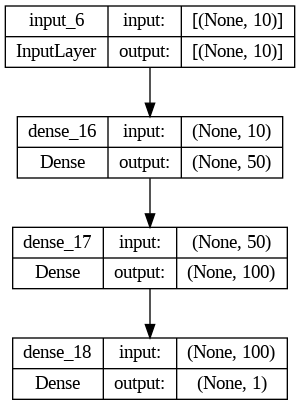

In [85]:
plot_model(model,show_shapes=True)

In [86]:
# 6.5 Compile model
#     Expt with adam
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

In [87]:
# Train
model.fit(X_train,y_train, epochs = 128)

Epoch 1/128
235/235 [==============================] - 2s 3ms/step - loss: 0.4759 - acc: 0.7944
Epoch 2/128
235/235 [==============================] - 1s 3ms/step - loss: 0.4333 - acc: 0.8133
Epoch 3/128
235/235 [==============================] - 1s 3ms/step - loss: 0.4087 - acc: 0.8287
Epoch 4/128
235/235 [==============================] - 1s 3ms/step - loss: 0.3841 - acc: 0.8419
Epoch 5/128
235/235 [==============================] - 1s 3ms/step - loss: 0.3723 - acc: 0.8449
Epoch 6/128
235/235 [==============================] - 1s 3ms/step - loss: 0.3670 - acc: 0.8508
Epoch 7/128
235/235 [==============================] - 1s 3ms/step - loss: 0.3611 - acc: 0.8551
Epoch 8/128
235/235 [==============================] - 1s 2ms/step - loss: 0.3596 - acc: 0.8532
Epoch 9/128
235/235 [==============================] - 1s 3ms/step - loss: 0.3581 - acc: 0.8532
Epoch 10/128
235/235 [==============================] - 1s 4ms/step - loss: 0.3565 - acc: 0.8552
Epoch 11/128
235/235 [=================

In [88]:
trad = model.predict(X_test)

79/79 [==============================] - 0s 1ms/step


In [89]:
trad

array([[0.86106104],
       [0.2129242 ],
       [0.16601941],
       ...,
       [0.07333431],
       [0.20736933],
       [0.01466868]], dtype=float32)

In [103]:
np.round(trad).shape

(2500, 1)

In [104]:
y_test.values

array([1, 0, 0, ..., 0, 0, 0])

In [105]:
y_test.values.shape

(2500,)

In [106]:
xy = np.round(trad).flatten()

In [107]:
xy.shape

(2500,)

In [109]:
(xy==y_test).sum()/len(y_test)#reshape either y_test or xy

0.8596

In [57]:
# 6.2 Start
model.add(tf.keras.layers.Dense(40, activation = 'relu'))  # MAke it 5 and then 20 (not more or less)

In [58]:
# 6.2.1 Experiment with adding a dropout layer
#       but then increase number of units in Dense layer from 20 to 40
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [59]:
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [60]:
model.add(tf.keras.layers.Dense(10, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [61]:
# 6.3 Experiment first with activation of sigmoid
#     and then no activation function
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))    # Keep sigmoid; then remove sigmoid

In [62]:
# 6.4 Model summary:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 dense_7 (Dense)             (None, 100)               5100      
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
 input_4 (InputLayer)        multiple                  0         
                                                                 
 dense_9 (Dense)             (None, 40)                80        
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_10 (Dense)            (None, 20)               

In [63]:
# 6.5 Compile model
#     Expt with adam
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

In [65]:
# 7.0
#
history1 = model.fit(X_train,y_train,
                    epochs = 70,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/70
235/235 [==============================] - 1s 3ms/step - loss: 0.3797 - acc: 0.8491 - val_loss: 0.3515 - val_acc: 0.8512
Epoch 2/70
235/235 [==============================] - 1s 3ms/step - loss: 0.3702 - acc: 0.8508 - val_loss: 0.3450 - val_acc: 0.8512
Epoch 3/70
234/235 [============================>.] - ETA: 0s - loss: 0.3696 - acc: 0.8492

KeyboardInterrupt: ignored

In [ ]:
# 7.1
model.evaluate(X_test,y_test)

In [ ]:
type(history.history)

In [ ]:
history.history.keys()

In [ ]:
# Plot without dropouts
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

In [ ]:
# plot with dropouts
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

In [ ]:
######################### I am done #################